In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("BreastCancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.drop('Unnamed: 32', axis=1, inplace = True)

In [6]:
df.drop('id', axis=1,inplace=True)

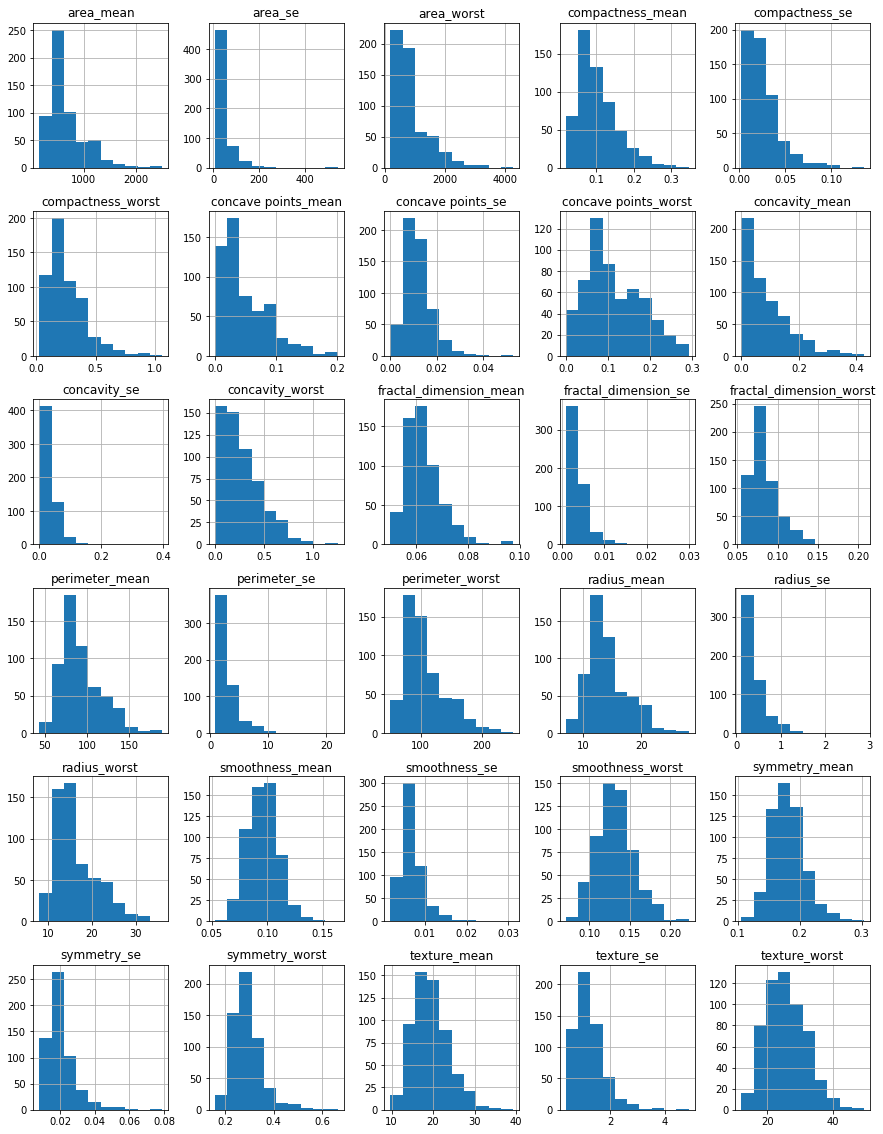

In [31]:
df.hist(figsize = (15,20))
plt.show()

In [35]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(df, figsize = (15,20))
#plt.show()

In [36]:
#plt.figure(figsize= (10,10))
#sns.heatmap(df.corr())

In [8]:
Y = df["diagnosis"]

In [9]:
df.drop('diagnosis', axis=1, inplace=True)

In [10]:
df.shape

(569, 30)

In [11]:
X_train, x_test, Y_train, y_test = train_test_split(df,Y, random_state =5)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [13]:
clf = SVC(gamma = 'auto')
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
y_pred = clf.predict(x_test)

score = accuracy_score(y_pred, y_test)

In [15]:
print(score)

0.6153846153846154


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.62      1.00      0.76        88
           M       0.00      0.00      0.00        55

   micro avg       0.62      0.62      0.62       143
   macro avg       0.31      0.50      0.38       143
weighted avg       0.38      0.62      0.47       143



c:\users\vikas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[88  0]
 [55  0]]


# Model Improvement
1) Normalize the data
2) Set the parameter of model to high gamma

In [18]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_normalized = (X_train - min_train)/range_train

In [19]:
X_train_normalized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
373,0.674885,0.258370,0.658015,0.565630,0.377629,0.270597,0.357779,0.444384,0.258081,0.105263,...,0.692338,0.297175,0.683080,0.542319,0.656957,0.269921,0.376380,0.725773,0.267047,0.101732
289,0.216859,0.310450,0.205191,0.119867,0.311456,0.094166,0.056209,0.108002,0.481313,0.209434,...,0.175863,0.376333,0.169494,0.084422,0.313915,0.067711,0.068136,0.213162,0.404372,0.097731
208,0.302831,0.433886,0.312559,0.183195,0.429448,0.395436,0.203960,0.253579,0.398990,0.505351,...,0.262803,0.456823,0.287986,0.139861,0.492390,0.400607,0.286154,0.386942,0.608933,0.344746
504,0.113000,0.106865,0.127973,0.049941,1.000000,0.627323,0.227976,0.261034,0.665657,0.984058,...,0.093291,0.116205,0.109396,0.035419,0.919648,0.307371,0.189955,0.352234,0.349964,0.460186
499,0.672415,0.389922,0.679705,0.558509,0.504378,0.444819,0.512652,0.557157,0.397980,0.267744,...,0.632394,0.499467,0.661952,0.485031,0.581241,0.322506,0.468688,0.726117,0.217391,0.229240


In [20]:
min_test = x_test.min()
range_test = (x_test - min_test).max()
X_test_normalized = (x_test - min_test)/range_test

In [21]:
X_test_normalized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
28,0.355990,0.630143,0.363307,0.230073,0.553036,0.492624,0.462999,0.457449,0.518651,0.316844,...,0.414799,0.796791,0.472349,0.254533,0.565411,0.630446,0.505990,0.734398,0.476754,0.369512
163,0.207179,0.498051,0.196554,0.113447,0.461819,0.248425,0.147730,0.147517,0.249641,0.363966,...,0.166543,0.528409,0.151616,0.075720,0.425006,0.204029,0.134824,0.297315,0.124248,0.302081
123,0.315771,0.007362,0.303261,0.190153,0.577795,0.278502,0.243246,0.302039,0.468436,0.287420,...,0.245213,0.103944,0.231566,0.123795,0.321744,0.141853,0.204473,0.443033,0.248697,0.210701
361,0.255442,0.469900,0.236412,0.148970,0.261402,0.113184,0.091994,0.126712,0.439024,0.136887,...,0.189550,0.545789,0.180510,0.092753,0.193225,0.128174,0.096805,0.203701,0.198196,0.096221
549,0.130763,0.584236,0.115507,0.068652,0.210581,0.121384,0.042586,0.042656,0.554519,0.271642,...,0.146133,0.620989,0.133699,0.063883,0.240770,0.124330,0.049473,0.118433,0.282766,0.178429


In [22]:
clf2 = SVC(gamma='auto', C=8.0)
clf2.fit(X_train_normalized, Y_train)

SVC(C=8.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
y_pred2 = clf2.predict(X_test_normalized)
score2 = accuracy_score(y_pred2, y_test)
print(score2)

0.9440559440559441


In [24]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           B       0.92      1.00      0.96        88
           M       1.00      0.85      0.92        55

   micro avg       0.94      0.94      0.94       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143



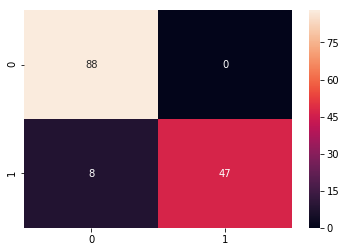

In [25]:
cm2 =confusion_matrix(y_test,y_pred2)
sns.heatmap(cm2, annot = True)

In [26]:
score2 = accuracy_score(y_pred2, y_test)
print(score2)

0.9440559440559441
